In [1]:
import fnmatch
import json
import os

import numpy as np
from pycocotools import mask
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval


In [107]:
import skimage.io as io

import matplotlib
matplotlib.use("nbagg")
import matplotlib.pyplot as plt

# change the json
json_file = "/media/ebonetto/WindowsData/pose_zebras_sw/all_about_zebras/ViTPose/data/apt36k/train/train_OZ.json"

#seq = np.random.choice(os.listdir(json_file))
#json_file = os.path.join(json_file, seq, f'mavic2_{seq}_coco_annotations.json') 
coco = COCO(json_file)


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


<IPython.core.display.Javascript object>


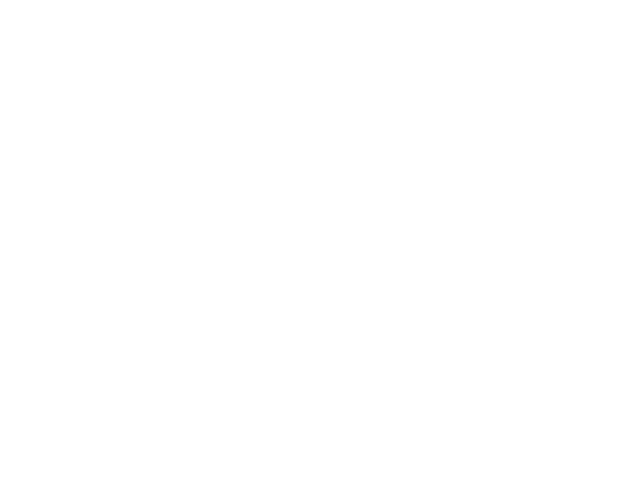

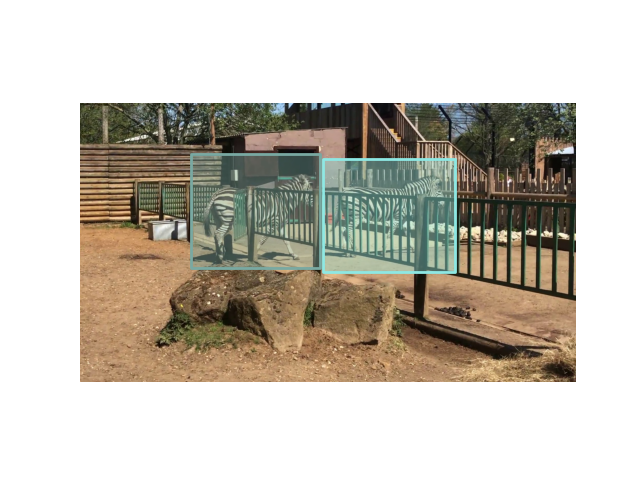

In [108]:
imgfolder = "/media/ebonetto/WindowsData/pose_zebras_sw/all_about_zebras/ViTPose/data/apt36k/train/images/" # if different than json_folder/images/whatever
catIds = [13]

plt.clf()

anns = []
imgIds = coco.getImgIds(catIds=catIds)
# change the index to load different images

img = coco.loadImgs(imgIds[17])[0]
fname = img['file_name']
if imgfolder == '':
    image_path = os.path.join(os.path.dirname(json_file), "./images", img['file_name'])
else:
    image_path = os.path.join(imgfolder, img['file_name'])

i = io.imread(image_path)
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

for ann in anns:
    for idx in range(2, len(ann['keypoints']),3):
        ann['keypoints'][idx] = 0
    
%matplotlib widget    
plt.imshow(i); plt.axis('off')
plt.axis('off')
coco.showAnns(anns, draw_bbox=True)
plt.show()

In [112]:
plt.savefig('/home/ebonetto/zebra_not_tight.png',  format='png', dpi=600, pad_inches=0.0, bbox_inches='tight')

In [28]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, *, dpi='figure', format=None, metadata=None,
              bbox_inches=None, pad_inches=0.1,
              facecolor='auto', edgecolor='auto',
              backend=None, **kwargs
             )
    
    The available output formats depend on the backend being used.
    
    Parameters
    ----------
    fname : str or path-like or binary file-like
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is set, it determines the output format, and the file
        is saved as *fname*.  Note that *fname* is used verbatim, and there
        is no attempt to make the extension, if any, of *fname* match
        *format*, and no extension is appended.
    
        If *format* is not set, then the format is inf

Filter the COCO json

In [24]:
f = "/media/ebonetto/WindowsData/ZEBRA_syn_kps/valid/valid.json"
tmp = json.load(open(f,'r'))

In [25]:
# tmp['categories'][1]['keypoints'] = [
#                         'left_back_paw','left_back_knee','left_back_thigh',
#                         'right_back_paw','right_back_knee','right_back_thigh',
#                         'right_front_paw','right_front_knee','right_front_thigh',
#                         'left_front_paw','left_front_knee', 'left_front_thigh',
#                         'tail_end','tail_base',
#                         'right_ear_tip','right_ear_base','left_ear_tip','left_ear_base',
#                         'right_eye','left_eye','nose',
#                         'neck_start','neck_end','skull','body_middle',
#                         'back_end','back_front'
#                     ]
# tmp['categories'][1]['skeleton'] = [
#     [1, 2], [2, 3], [3, 26],
#     [4, 5], [5, 6], [6, 26],
#     [7, 8], [8, 9],
#     [10,11], [11,12],
#     [13, 14],
#     [15, 16], [17,18],
#     [16, 19], [19, 20], [18, 20],
#     [19, 21], [20, 21], [19, 24], [20, 24],
#     [21, 24], [24, 23], [23, 22], [22, 27], [27, 9], [27, 12], [27, 25], [25, 26], [26, 14]
# ]

torem = []
for idx, j in enumerate(tmp['annotations']):
    if min(j['bbox'][2:]) < 30:
        torem.append(idx)
    if 'keypoints' not in j.keys():
        torem.append(idx)
for i in torem[::-1]:
    tmp['annotations'].pop(i)

In [26]:
json.dump(tmp, open(f[:-5]+'_filtered.json','w'))

In [23]:
len(tmp['annotations'])

240597